### Loose EDA

data: from https://zenodo.org/record/4060432#.X5ySHHhKgWo


Thesis: identify humans (voice), animals, instruments, water, door, car, explosion (boom, thunder)

3 Main CNN Models:

Spectrograms
MFCC Image Analysis
Mean-MFCC Coefficient Analysis

To do items:

Update:
1. model on image analysis of Mel Frequency Spectrogram (images)
2. model on analysis of coefficients of MFCC (unless it ends up making sense to analyze the image as well)


- create new columns of labels I will use (tags too long and many)

- extract MFCC of all files to add to dataframe

- consider need to trim audio files to make same length, OR adding length to short files (padding them?)

In [9]:
import pandas as pd
%matplotlib inline

In [51]:
dev_info = pd.read_json('data/FSD50K.metadata/dev_clips_info_FSD50K.json').T

In [52]:
eval_info = pd.read_json('data/FSD50K.metadata/eval_clips_info_FSD50K.json').T

In [53]:
dev_info['track_num'] = dev_info.index
dev_info['wav_name'] = dev_info['track_num'].apply(lambda x: str(x) + '.wav')
dev_info['png_name'] = dev_info['track_num'].apply(lambda x: str(x) + '.png')
dev_info = dev_info.sort_index()
dev_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png


In [54]:
dev_info.shape

(40966, 8)

In [55]:
eval_info['track_num'] = eval_info.index
eval_info['wav_name'] = eval_info['track_num'].apply(lambda x: str(x) + '.wav')
eval_info['png_name'] = eval_info['track_num'].apply(lambda x: str(x) + '.png')

eval_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name
391277,Spring Birds Forest 04 Amp.wav,An other birds singings recorded on the mornin...,"[birdsong, bird, forest, environment, morning,...",http://creativecommons.org/publicdomain/zero/1.0/,ANARKYA,391277,391277.wav,391277.png
392115,Snap of fingers,a snap of one's fingers,"[fingers, finger, 5maudio17, uam, fingersnap]",http://creativecommons.org/publicdomain/zero/1.0/,edton,392115,392115.wav,392115.png
411438,Pouring Water,A sound of Hot water pouring into a cup,"[fill, can, beverage, glass, water, pour, drin...",http://creativecommons.org/publicdomain/zero/1.0/,edsward,411438,411438.wav,411438.png
395238,Tearing papers.wav,Tearing papers with reverb.\r\n\r\nI used a Sa...,"[ripping, papier, paper, scheuren, rip, tearing]",http://creativecommons.org/licenses/by/3.0/,ellenmentor,395238,395238.wav,395238.png
425681,sigh.mp3,i recorded me sighing.,"[sad, happy, sigh]",http://creativecommons.org/publicdomain/zero/1.0/,Camo1018,425681,425681.wav,425681.png


In [56]:
eval_info.shape

(10231, 8)

# Building Labels Column with Lamdba Conditional Functions

In [71]:
human_words = ['human', 'man', 'male', 'voice','woman','female',
                'talk', 'talking', 'announcement', 'announcer',
              'conversations', 'people', 'chant', 'whisper',
              'speech','yelling', 'yell']

comedy_words = ['comedy', 'laughing', 'laughs', 'laugh']

foley_words = ['keyboard', 'keys', 'coin', 'money', 'scratch', 'coins', 
               'crackle', 'eating', 'click', 'zipper', 'tools', 'foley', 'breath', 'cough',
              'creaking', 'squeak', 'skateboard', 'bicycle', 'bike', 'crunch',
              'crinkle', 'thump', 'noise', 'plastic', 'sfx', 'typing', 'zip', 'knife',
              'tape', 'breathe', 'brush', 'toothbrush', 'velcro', 'cup', 'scissors',
               'swish', 'hands', 'flame', 'shuffling', 'eat', 'sigh', 'pen']

baby_words = ['crying','baby', 'scream', 'screaming', 'children','child','kids', 'boy', 'girl']

animal_words = ['dog', 'dogs', 'cat', 'bark', 'purr', 'frogs','frog', 'cricket', 
                'crickets', 'birds', 'bird', 'warbler', 'insects','birdsong',
               'bee', 'insect','pigs', 'pig','animal-sounds','grasshopper','bugs',
               'ducks', 'rooster', 'owl', 'monkey', 'animals', 'cattle',
               'hen', 'hens', 'fart','flatulence', 'animal', 'belch', 'burp',
                'neighing','snorting','whinny', 'whinnie','snort', 'breathing',
               'yawn','farm', 'sneeze', 'snore', 'growl', 'throat','canary', 'geese']

music_words = ['instrument', 'guitar', 'piano', 'bell', 'shaker', 
               'sax', 'clarinet', 'riff', 'single-note', 'chord',
              'electric-piano', 'bass', 'cello', 'organ', 'violin', 'viola', 
               'double-bass', 'classical-guitar', 'chordophone',
               'transverse-flute','bassoon', 'flute', 'trumpet', 'harmonica',
              'music', 'brass', 'saxophone', 'orchestra', 'drumloop', 'chords',
              'bells', 'electro', 'groovy', 'world-music', 'clink', 'horn',
              'harp', 'theremin', 'xylophone', 'ukulele', 'vibraphone',
              'metalic', 'singing', 'vocals', 'gong', 'doorbell', 'ringtone',
              'marimba', 'singing-bowl', 'windchime']

percussion_words = ['drums', 'drum', 'bass-drum', 'percussion', 
                    'cymbal' ,'hi-hat', 'hihat','tambourine''xylophone', 'didgeridoo', 'snare',
                   'tambourine', 'fingersnap', 'tabla', 'percussive', 'clapping', 'rattle',
                   'bassdrum']

nature_words = ['water', 'rain', 'wind', 'ocean', 'waterfall', 'peeing',
                'whoosh', 'nature', 'faucet', 'boiling', 'dripping', 'flush', 'liquid',
               'river', 'flushing']

machinery_words = ['car', 'engine', 'bus', 'driving', 'drive', 'mixer',
                   'machine', 'drill','blender', 'blendering', 'trains','train', 'metro',
                  'helicopter', 'motorcycle', 'airplane', 'mechanical', 'vacuum', 'truck',
                  'cars', 'subway', 'motor', 'electric']

ambient_words = ['environmental-sounds-research','applause', 'clap', 'crowd', 'traffic',
                'air', 'sea', 'fan', 'london', 'aviation','aircraft', 'city', 'ferry',
                'ship']

door_words = ['door', 'opening', 'closing', 'drawer', 'shut', 'close', 'gate', 'doorslam',
             'breaking', 'tear']

fire_words = ['lighter','fire', 'spark', 'explosion', 'glass', 'thunder', 
              'lightning', 'gun', 'crack','burning', 'bang', 'banging', 'hit',
             'beep', 'beeping', 'kettle', 'alarm', 'phone', 'fireworks', 'breaking-glass',
             'pistol', 'rifle', 'shot', 'pop','break','steam', 'siren', 'shotgun']

movement_words = ['footsteps', 'clop', 'walk', 'walking','steps', 'hooves', 'trot',
                  'gallop', 'horse', 'running', 'footstep']

# combine foley with household
household_words = ['cooking', 'pot', 'pan', 'slicing', 'cutting', 'cut', 'writing', 'write'
                   'sharpening', 'clock', 'ticking', 'paper', 'camera', 'metal', 'hammer', 'telephone',
                  'tap', 'tapping', 'kitchen', 'tool', 'saw', 'printer', 'wood', 'microwave',
                  'bathroom']




def cat_labeler(tag_list):
    if set(human_words).intersection(tag_list):
        return 0 #'human'
    elif set(comedy_words).intersection(tag_list):
        return 1 #'comedy'
    elif set(door_words).intersection(tag_list):
        return 2 #'door'  
    elif set(baby_words).intersection(tag_list):
        return 3 #'baby'
    elif set(animal_words).intersection(tag_list):
        return 4 #'animal'    
    elif set(music_words).intersection(tag_list):
        return 5 #'music'
    elif set(percussion_words).intersection(tag_list):
        return 6 #'percussion'
    elif set(machinery_words).intersection(tag_list):
        return 7 #'machines'
    elif set(ambient_words).intersection(tag_list):
        return  8#'ambient'
    elif set(fire_words).intersection(tag_list):
        return 9 #'fire'   
    elif set(movement_words).intersection(tag_list):
        return 10 #'movement'
    elif set(household_words).intersection(tag_list):
        return 11 #'household'
    elif set(foley_words).intersection(tag_list):
        return 12 #'foley'  
    elif set(nature_words).intersection(tag_list):
        return 13 #'nature'
    else:
        return 14 #'other'


# Labeling Dev and Eval Datasets

In [72]:
dev_info.shape

(40966, 9)

In [73]:
dev_info['labels'] = dev_info['tags'].apply(cat_labeler) 

eval_info['labels'] = eval_info['tags'].apply(cat_labeler)    

In [74]:
dev_info

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png,0
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png,11
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png,8
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png,5
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png,7
...,...,...,...,...,...,...,...,...,...
435288,Farts_37.wav,"dloaded from freesound with CC0 , Sliced, Resa...","[comedy, fart, effect, farts, sfx, soundfx, so...",http://creativecommons.org/publicdomain/zero/1.0/,penetrermind,435288,435288.wav,435288.png,1
435414,explosion11.wav,Explosion sounds made with Audacity with brown...,"[detonation, explosion, boom, bang, explode, b...",http://creativecommons.org/publicdomain/zero/1.0/,V-ktor,435414,435414.wav,435414.png,9
435415,explosion10.wav,Explosion sounds made with Audacity with white...,"[detonation, explosion, boom, bang, explode, b...",http://creativecommons.org/publicdomain/zero/1.0/,V-ktor,435415,435415.wav,435415.png,9
435557,Cup on Table,Put a mug on the table or desk.,"[tray, table, put, place, mug, drop, cup]",http://creativecommons.org/licenses/by/3.0/,dersuperanton,435557,435557.wav,435557.png,12


In [75]:
# dictionary for remaining tags

remaining_tags_dict = {}

for row in dev_info[dev_info.labels == 'other']['tags']:
    for tag in row:
        if tag not in remaining_tags_dict:
            remaining_tags_dict[tag] =1
        else:
            remaining_tags_dict[tag] += 1  
            
            
remaining_tags_series = pd.Series(remaining_tags_dict)
remaining_tags_series.sort_values(ascending=False).iloc[:20]

/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


Series([], dtype: float64)

In [76]:
for row in dev_info[dev_info.labels == 'other']['tags']:
    for tag in row:
        if tag == 'flushing':
            print(row)

In [77]:
dev_info.labels.value_counts()

5     11633
0      4566
4      3797
9      3721
6      2740
7      2723
12     2439
11     2229
2      2214
13     1510
8      1134
14      776
10      700
1       459
3       325
Name: labels, dtype: int64

In [78]:
eval_info.labels.value_counts()

5     1649
0     1183
4      928
7      909
11     883
9      866
12     804
2      721
14     568
6      521
13     462
8      295
10     213
3      134
1       95
Name: labels, dtype: int64

In [79]:
dev_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png,0
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png,11
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png,8
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png,5
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png,7


In [80]:
eval_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels
391277,Spring Birds Forest 04 Amp.wav,An other birds singings recorded on the mornin...,"[birdsong, bird, forest, environment, morning,...",http://creativecommons.org/publicdomain/zero/1.0/,ANARKYA,391277,391277.wav,391277.png,4
392115,Snap of fingers,a snap of one's fingers,"[fingers, finger, 5maudio17, uam, fingersnap]",http://creativecommons.org/publicdomain/zero/1.0/,edton,392115,392115.wav,392115.png,6
411438,Pouring Water,A sound of Hot water pouring into a cup,"[fill, can, beverage, glass, water, pour, drin...",http://creativecommons.org/publicdomain/zero/1.0/,edsward,411438,411438.wav,411438.png,9
395238,Tearing papers.wav,Tearing papers with reverb.\r\n\r\nI used a Sa...,"[ripping, papier, paper, scheuren, rip, tearing]",http://creativecommons.org/licenses/by/3.0/,ellenmentor,395238,395238.wav,395238.png,11
425681,sigh.mp3,i recorded me sighing.,"[sad, happy, sigh]",http://creativecommons.org/publicdomain/zero/1.0/,Camo1018,425681,425681.wav,425681.png,12


In [83]:
dev_info[dev_info.labels.isnull()]

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels


In [84]:
dev_info[dev_info.tags.isnull()]

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels


In [90]:
dev_info.head()

,title,description,tags,license,uploader,track_num,wav_name,png_name,labels
63,RalfHutterWorking.wav,"Ralf Hutter from Kraftwerk saying ""Working on ...","[male, voice]",http://creativecommons.org/licenses/by/3.0/,fectoper,63,63.wav,63.png,0
136,keyboard-rhymtic.wav,Noise of an average logitech keyboard. Pretty ...,"[keyboard, rhythmic, tap, type]",http://creativecommons.org/licenses/by/3.0/,Anton,136,136.wav,136.png,11
137,keyboard-typing.wav,Noise of an average logitech keyboard. Pretty ...,"[computer, environmental-sounds-research, key,...",http://creativecommons.org/licenses/by/3.0/,Anton,137,137.wav,137.png,8
221,bell.wav,simple *ting* sound,[bell],http://creativecommons.org/publicdomain/zero/1.0/,Erratic,221,221.wav,221.png,5
236,BUSSES.aiff,Departing busses\r\n at Utrecht Central Railwa...,"[bus, depart, drive, station]",http://creativecommons.org/licenses/by-nc/3.0/,hanstimm,236,236.wav,236.png,7


In [87]:
eval_info.shape

(10231, 9)

In [89]:
dev_info.to_json('data/labelled_dev_info.json')
# pd.read_csv('data/labelled_dev_info.csv', index_col=0)

In [86]:
# error saving dataframe, using pickle instead
import pickle

with open('/Users/Mateo/Springboard/FSD50k/data/labelled_dev_info_csv.pkl', 'wb') as f:
    pickle.dump(dev_info, f)
    
# # loading pickle

# with open('/Users/Mateo/Springboard/FSD50k/data/mfcc_100.pkl', 'rb') as f:
#     loaded_mfcc_list = pickle.load(f)    

In [91]:
eval_info.to_json('data/labelled_eval_info.json')
# pd.read_csv('data/labelled_eval_info.csv', index_col=0)

# Audio Tags EDA 

In [65]:
# Investigating lengths of tags per audio file

tag_length_counter = {}

for row in dev_info.tags:
    num_tags = len(row)
    if num_tags not in tag_length_counter:
        tag_length_counter[num_tags] =1
    else:
        tag_length_counter[num_tags] += 1     

tag_lengths_series = pd.Series(tag_length_counter)
tag_lengths_series.sort_values(ascending=False).iloc[:20]  

6     6167
3     5006
5     4914
4     4856
7     3725
8     2967
9     2836
10    2164
11    1163
12    1068
2      983
13     732
14     683
16     475
15     421
21     350
18     296
17     280
1      267
19     250
dtype: int64

In [42]:
# Investigating how many unique tags there are.

unique_tags = []

for tag_list in dev_info.tags:
    for tag in tag_list:
        if tag not in unique_tags:
            unique_tags.append(tag)

In [67]:
print(len(unique_tags))
unique_tags[:20]

16309


['male',
 'voice',
 'keyboard',
 'rhythmic',
 'tap',
 'type',
 'computer',
 'environmental-sounds-research',
 'key',
 'typing',
 'bell',
 'bus',
 'depart',
 'drive',
 'station',
 'car',
 'engine',
 'passing',
 'dutch',
 'speech']

In [103]:
# Checking Value Counts for Unique Tags

dict_counter = {}

for row in dev_info.tags:
    for tag in row:
        if tag not in dict_counter:
            dict_counter[tag] =1
        else:
            dict_counter[tag] += 1     
            
all_tags_series = pd.Series(dict_counter)
all_tags_series = all_tags_series.sort_values(ascending=False)
all_tags_series.head(20)

multisample        5564
single-note        3768
field-recording    3490
good-sounds        3081
neumann-u87        3080
voice              2511
water              2167
percussion         1728
guitar             1606
drum               1434
door               1300
metal              1271
hit                1178
velocity           1177
female             1165
loop               1154
vsco-2             1089
noise              1082
nature             1066
male               1058
dtype: int64

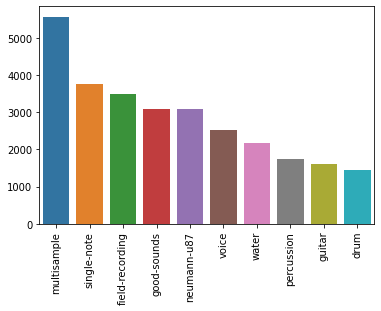

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=all_tags_series.iloc[:10].index, y=all_tags_series.iloc[:10].values)
plt.xticks(rotation=90)
plt.show()

In [82]:
# Investigating what the whole tag list description is for the most common tags: 'multisample'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'multisample':
            print(row)
            counter += 1
    if counter == 10:
        break

['distortion', 'dive', 'electric', 'free', 'guitar', 'heavy', 'metal', 'multisample', 'note', 'sample', 'sampler', 'sound', 'speed', 'thrash', 'tremolo', 'wave', 'whammy']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']
['chord', 'electric', 'guitar', 'multisample', 'power']


In [83]:
# Investigating what the whole tag list description is for the most common tags: 'field-recording'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'field-recording':
            print(row)
            counter += 1
    if counter == 10:
        break

['environmental-sounds-research', 'field-recording', 'train']
['bark', 'dog', 'field-recording']
['cat', 'field-recording', 'purr']
['cat', 'field-recording', 'roar']
['cat', 'field-recording', 'purr']
['beat', 'field-recording', 'kitchen', 'metal']
['bass', 'drone', 'field-recording', 'machinery']
['field-recording', 'hiss', 'noise', 'rustle', 'stove-pipe', 'wind']
['field-recording', 'hiss', 'rustle', 'stove-pipe', 'wind']
['bridge', 'canada', 'field-recording', 'montreal', 'passing', 'train']


In [84]:
# Investigating what the whole tag list description is for the most common tags: 'voice'

counter = 0 # 

for row in dev_info['tags']:
    for tag in row:
        if tag == 'voice':
            print(row)
            counter += 1
    if counter == 10:
        break

['male', 'voice']
['animal', 'growl', 'horror', 'monster', 'processed', 'voice']
['analogx', 'anderstein', 'dj', 'free', 'hip-hop', 'rap', 'sample', 'scratch', 'sound', 'vinyl', 'voice']
['boy', 'child', 'eio', 'free', 'human', 'lofi', 'sample', 'singing', 'sound', 'voice']
['female', 'human', 'phone', 'raw', 'sexy', 'voice']
['female', 'human', 'phone', 'raw', 'sexy', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'singing', 'voice']
['girl', 'human', 'processed', 'singing', 'voice']


# Metadata EDA

In [49]:
# Value Counts for License Column

print("Number of Unique License Types:", dev_info.license.nunique())
dev_info.license.value_counts()

Number of Unique License Types: 4


http://creativecommons.org/licenses/by/3.0/           20017
http://creativecommons.org/publicdomain/zero/1.0/     14959
http://creativecommons.org/licenses/by-nc/3.0/         4616
http://creativecommons.org/licenses/sampling+/1.0/     1374
Name: license, dtype: int64

In [48]:
# Value Counts for Uploader Column

print("Number of Unique Uploaders:", dev_info.uploader.nunique())
dev_info.uploader.value_counts().iloc[:20]

4947


MTG                          3080
Samulis                      1122
quartertone                  1021
NoiseCollector                663
Corsica_S                     575
dobroide                      547
Robinhood76                   478
Carlos_Vaquero                390
pjcohen                       377
Reitanna                      354
delphidebrain                 352
IFartInUrGeneralDirection     346
Jagadamba                     341
qubodup                       310
sandyrb                       252
clruwe                        249
kwahmah_02                    244
lex1975                       237
Adam_N                        219
InspectorJ                    215
Name: uploader, dtype: int64

In [50]:
print("Number of Unique Uploaders:", eval_info.uploader.nunique())
eval_info.uploader.value_counts().iloc[:20]

Number of Unique Uploaders: 2297


Timbre                 135
nicStage                82
cognito perceptu        74
Heigh-hoo               66
juskiddink              65
V4cuum                  63
Tomlija                 62
Puniho                  60
RHumphries              59
macdaddyno1             55
Soundscape_Leuphana     52
milton.                 52
zagi2                   50
jppi_Stu                50
joedeshon               49
UncleSigmund            48
bsumusictech            48
xserra                  45
lonemonk                44
morgantj                44
Name: uploader, dtype: int64

In [64]:
# checking for continuity of uploaders between dev and eval datasets
# it appears that there is no overlap of between datasets (double check this...)

set(eval_info.uploader.unique()).intersection(set(dev_info.uploader.unique()))

set()